# Matplotlib - Scatter, Error, & Histograms
## Simple Scatter Plots
#### with plt.plot

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

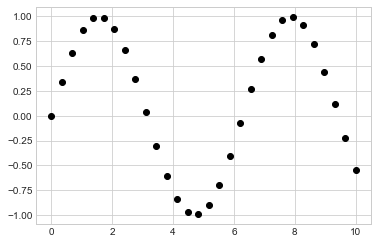

In [2]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

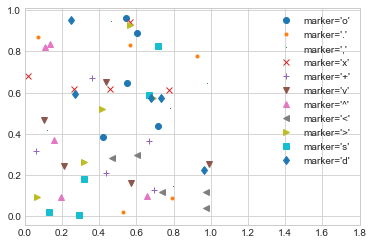

In [5]:
# different plotting symbols
rng = np.random.RandomState(0)
for marker in['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

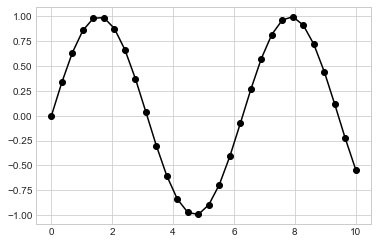

In [6]:
plt.plot(x, y, '-ok'); # line (-), circle marker (o), black(k)

(-1.2, 1.2)

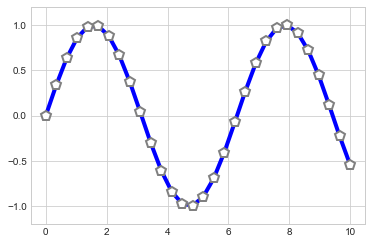

In [9]:
# additional keywords
plt.plot(x, y, '-p', color = 'blue', markersize=10, linewidth=4,
         markerfacecolor='white', markeredgecolor='gray', markeredgewidth=2)
plt.ylim(-1.2, 1.2)

## Scatter Plots with plt.scatter

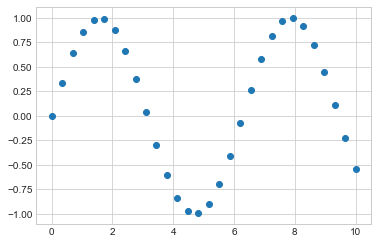

In [10]:
# can use plt.scatter directly
plt.scatter(x, y, marker='o');

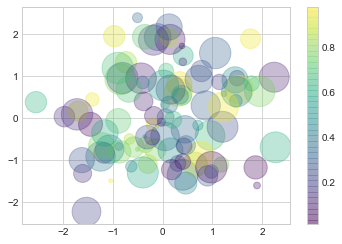

In [11]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar(); # show color scale

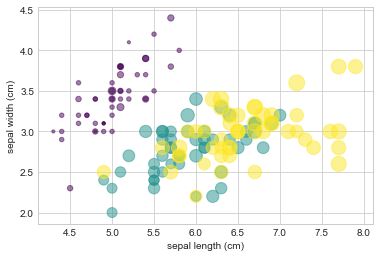

In [15]:
# example- using iris data
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.5, s=100*features[3],
            c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

**Tip**: *plt.plot()* is much more efficient than *plt.scatter()* for large datasets.

## Visualizing Errors
### Basic Errorbars

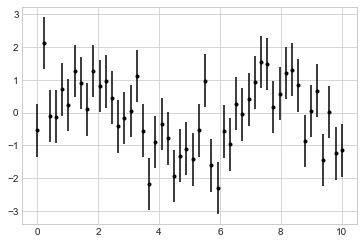

In [16]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

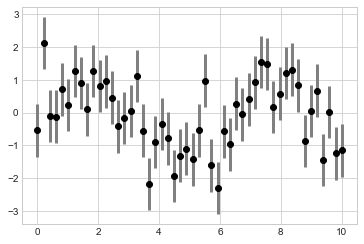

In [18]:
# errorbar with additional arguments
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='gray', elinewidth=3, capsize=0);

## Continuous Errors
#### Gaussian Process Regression (GPR)

In [25]:
from sklearn.gaussian_process import GaussianProcess

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

In [31]:
# Compute the Gaussian process fit
gp = GaussianProcess(corr='cubic', theta0=0.01, thetaL=0.0001, thetaU=0.1, random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE) # 2*sigma ~ 95% confidence region

/Volumes/RobStorage/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/Volumes/RobStorage/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


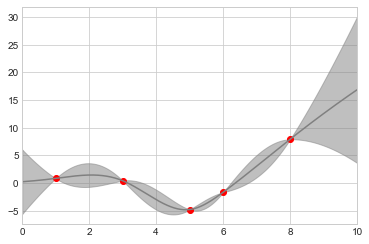

In [33]:
# visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit,yfit - dyfit, yfit + dyfit, color='gray', alpha=0.5)
plt.xlim(0, 10);

## Density and Contour Plots
### Visualizing a Three-Dimensional Function

In [34]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [35]:
x = np.linspace(0, 5, 50) # x position on the plot
y = np.linspace(0, 5, 40) # y position on the plot

X, Y = np.meshgrid(x, y) # build a 2D grid
Z = f(X, Y) # Z = contour levels

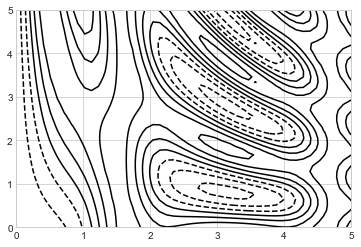

In [36]:
plt.contour(X, Y, Z, colors='black');

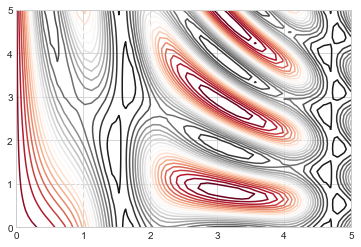

In [41]:
# add some color
# 20 means: 20 even spaced intervals
plt.contour(X, Y, Z, 20, cmap='RdGy');

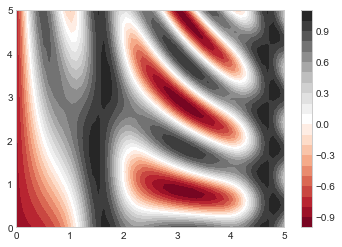

In [47]:
# improve colors with plt.contourf <---- NOTICE the "f" at the end
# black regions are peaks and red regions are valleys
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

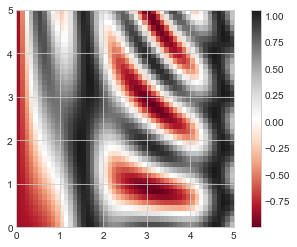

In [48]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

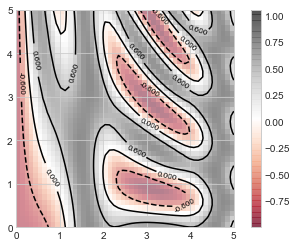

In [49]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0,5,0,5], origin='lower', cmap='RdGy', alpha=0.5)
plt.colorbar();

## Histograms, Binnings, and Density

In [50]:
plt.style.use('seaborn-white')

data = np.random.randn(1000)

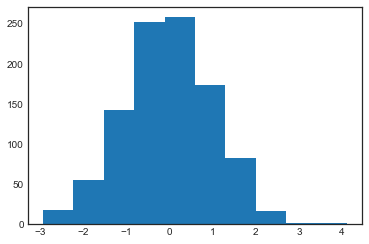

In [52]:
plt.hist(data);

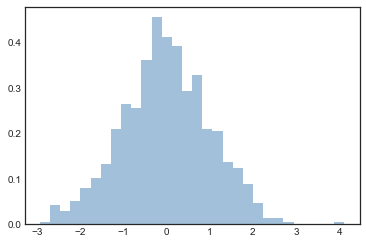

In [53]:
plt.hist(data, bins=30, normed=True, alpha=0.5, histtype='stepfilled',
         color='steelblue', edgecolor='none');

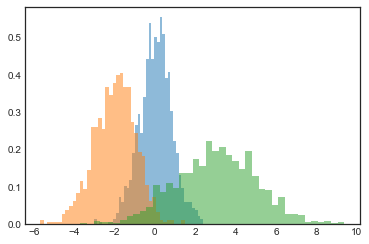

In [55]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.5, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [56]:
counts, bin_edges = np.histogram(data, bins=5)
print counts

[ 73 394 432  99   2]


## Two-Dimensional Histograms and Binnings

In [57]:
mean = [0,0]
cov = [[1,1], [1,2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

#### plt.hist2d: Two-dimensional histogram

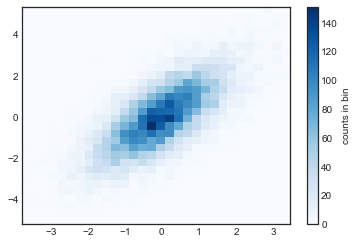

In [58]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [60]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

#### plt.hexbin: Hexagonal binnings

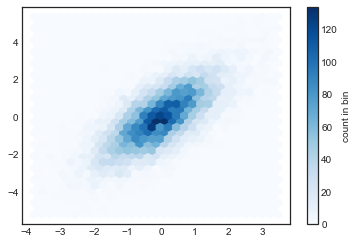

In [61]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

#### Kerned density estimation (KDE)

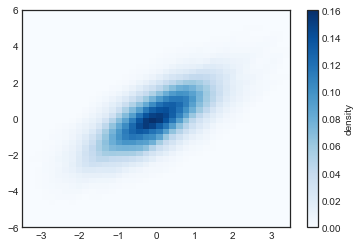

In [62]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6], cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")